#### [PREV](4.OOP_Logistic_Regression.ipynb) | [HOME](../README.md) | [NEXT](6.OOP_Neural_Network_Simple.ipynb)

---

# OOP K-Nearest Neighbour Implementation

This Jupyter Notebook provides a basic implementation of K-Nearest Neighbour for categorisation. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects sex given the latitude and wingspan.

#### Step 1 - Import Dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier

#### Step 2 - Import And Visualise The Data

In [4]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/KKN-Attendance.csv', sep='\t')
insects = pd.DataFrame({
    'Attendance': insects['Attendance'],
    'Enjoyment': insects['SchoolEnjoyment'],
    'Studying Hours': insects['HoursStudying/AvgDay'],
})

# Training variables
X_insects = insects['Enjoyment']
y_insects = insects['Studying Hours']

# Training data, 'X and y' labels are required by the KNeighborsClassifier
neighbours = pd.DataFrame({'X': X_insects, 'y': y_insects})

# Target variable
X_class = insects['Attendance']

insects.head()

,Attendance,Enjoyment,Studying Hours
0,100,1,5
1,94,2,3
2,88,2,1
3,98,1,3
4,94,2,1


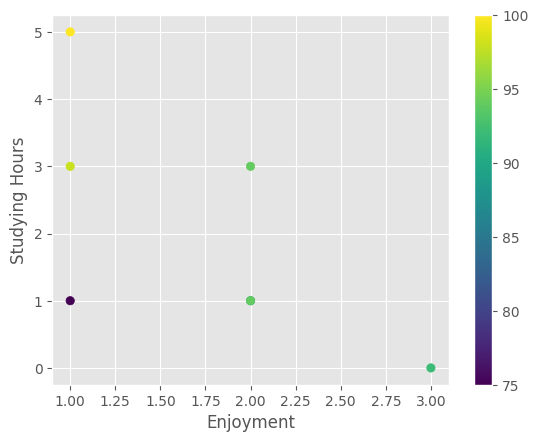

In [5]:
# Plot the data, colour coded by sex
plt.scatter(X_insects, y_insects, c=X_class)
plt.xlabel(X_insects.name)
plt.ylabel(y_insects.name)
plt.colorbar()
plt.show()

#### Step 3: Instantiate a K-Nearest Neighbour Classification Object

In [10]:
#Note: n_neighbors should always be odd
knn = KNeighborsClassifier(n_neighbors=3)

#### Step 4: Fit the model

In [11]:
knn.fit(neighbours, X_class)

KNeighborsClassifier(n_neighbors=3)

#### Step 5: Predict Values

In [12]:
#Predict the target for a new data point
new_insect_latitude = 2
new_insect_wingsize = 1
new_insect = pd.DataFrame({
    'X': [new_insect_latitude],
    'y': [new_insect_wingsize]
})

predicted_sex = knn.predict(new_insect)

print(f"The predicted sex for an insect with latitude {new_insect_latitude} and wing size {new_insect_wingsize}: {predicted_sex}")

The predicted sex for an insect with latitude 2 and wing size 1: [75]


#### Step 5: Plot the Predictions

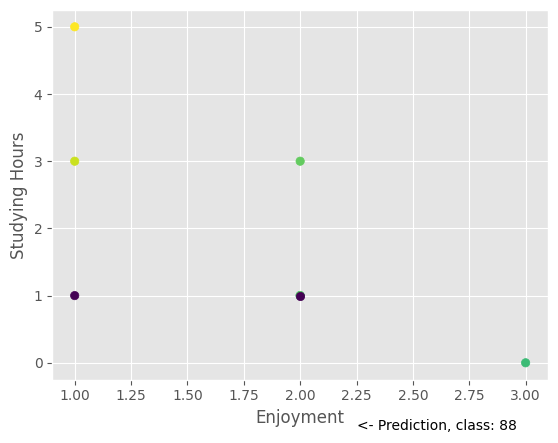

In [9]:
#Plot the new insect compared to the training data
plt.scatter(X_insects, y_insects, c=X_class)
plt.scatter(new_insect_latitude, new_insect_wingsize, c=predicted_sex)
plt.text(x=new_insect_latitude+0.25, y=new_insect_wingsize-2, s=f"<- Prediction, class: {predicted_sex[0]}")
plt.xlabel(X_insects.name)
plt.ylabel(y_insects.name)
plt.show()